In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## import raw data

In [97]:
df = pd.read_excel('../df.xlsx')
df['UTC_Time'] = pd.to_datetime(df['UTC_Time'])
df

,Unnamed: 0,User_ID,UTC_Time,Account,Operation,Coin,Change,Remark
0,16,15578312,2021-07-15 14:37:34,Spot,Deposit,BUSD,40000.000000,NaN
1,16,15578312,2021-07-15 14:37:34,Spot,Deposit,BNB,9.000000,NaN
2,17,15578312,2021-07-15 18:06:30,Spot,Fee,BNB,-0.000944,NaN
3,18,15578312,2021-07-15 18:06:30,Spot,Buy,BUSD,-392.125000,NaN
4,19,15578312,2021-07-15 18:06:30,Spot,Buy,BUSD,-627.360000,NaN
...,...,...,...,...,...,...,...,...
1753,3287,15578312,2022-05-30 00:00:00,USDT-Futures,Funding Fee,USDT,0.073641,NaN
1754,3289,15578312,2022-05-30 08:00:00,USDT-Futures,Funding Fee,USDT,0.076566,NaN
1755,3290,15578312,2022-05-30 16:00:00,USDT-Futures,Funding Fee,USDT,0.076549,NaN
1756,3291,15578312,2022-05-30 21:22:39,USDT-Futures,Insurance fund compensation,USDT,-0.000092,穿仓保证金补偿


In [98]:
df.dtypes

Unnamed: 0             int64
User_ID                int64
UTC_Time      datetime64[ns]
Account               object
Operation             object
Coin                  object
Change               float64
Remark                object
dtype: object

## spot wallet

### wallet balance overview

In [99]:
#spot balance per coin, enhanced with a current price in USDT
df_spot = df.loc[df['Account'] == 'Spot']
balance_spot = df_spot.groupby('Coin').sum()['Change']
balance_spot

Coin
AVAX         80.000000
BETA          0.575746
BNB           8.807388
BUSD      32656.980012
DOT          20.000000
EDG         113.678000
ETH           0.416500
FTM           0.634235
LINK         15.000000
LUNA         10.000000
MATIC         0.000000
MBOX          0.061339
QI          -32.500000
QISWAP       32.500000
SAND       3000.000000
USDT       1965.789020
Name: Change, dtype: float64

In [100]:
df_prices = pd.read_excel('../current_prices.xlsx', index_col=0)
df_prices

,symbol,price
0,ETHBTC,0.059244
1,LTCBTC,0.002042
2,BNBBTC,0.009548
3,NEOBTC,0.000398
4,QTUMETH,0.002192
...,...,...
2061,OPBUSD,0.913000
2062,OPUSDT,0.914000
2063,OGBUSD,3.193000
2064,KEYBUSD,0.004312


In [101]:
holding_prices = []
for i in balance_spot.index:
    try:
        price = df_prices.loc[df_prices['symbol'] == (i + 'USDT')]['price'].values[0]
        holding_prices.append(price)
    except:
        holding_prices.append(np.nan)
balance_spot = pd.DataFrame(balance_spot)
balance_spot['USDT_price'] = holding_prices
balance_spot['USDT_value'] = holding_prices * balance_spot['Change']
print(f'current total value: {round(balance_spot["USDT_value"].sum(), 2)} USDT')
balance_spot


current total value: 42109.78 USDT


,Change,USDT_price,USDT_value
Coin,,,
AVAX,80.000000,24.08000,1926.400000
BETA,0.575746,0.12876,0.074133
BNB,8.807388,287.90000,2535.647120
BUSD,32656.980012,1.00070,32679.839898
DOT,20.000000,9.00000,180.000000
EDG,113.678000,NaN,NaN
ETH,0.416500,1786.25000,743.973125
FTM,0.634235,0.33980,0.215513
LINK,15.000000,8.53000,127.950000


### funding history

In [102]:
df_spot.loc[df_spot['Operation'] == 'Deposit'].groupby('Coin').sum()['Change']

Coin
BNB         9.000000
BUSD    42000.000000
FTM      2278.634235
Name: Change, dtype: float64

In [103]:
df_spot.loc[df_spot['Operation'] == 'Withdraw'].groupby('Coin').sum()['Change']

Coin
BUSD     -750.0
FTM     -2340.0
MATIC    -500.0
Name: Change, dtype: float64

### trades plot

In [122]:
prices = pd.read_excel('../ETHUSDT_1d_30jun2021_7jun2022.xlsx')
prices['open_time'] = pd.to_datetime(prices.open_time, unit='ms')
prices = prices.drop(['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore', 'close_time'], axis=1)
prices

,open_time,close
0,2021-06-30,2275.68
1,2021-07-01,2106.41
2,2021-07-02,2154.13
3,2021-07-03,2226.99
4,2021-07-04,2322.69
...,...,...
338,2022-06-03,1775.12
339,2022-06-04,1804.58
340,2022-06-05,1806.23
341,2022-06-06,1859.84


In [121]:
buy = df_spot.loc[df_spot['Operation'] == 'Buy'].loc[df_spot['Coin'] == 'ETH'].groupby('UTC_Time').sum()['Change'].reset_index()
buy['UTC_Time'] = pd.to_datetime(buy['UTC_Time'], unit='ms')
buy

,UTC_Time,Change
0,2021-10-13 17:49:15,0.4165


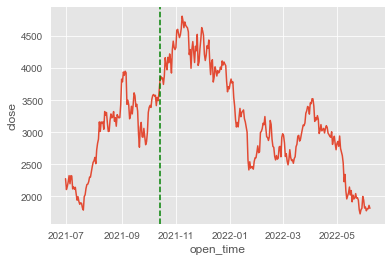

In [125]:
sns.lineplot(x='open_time', y='close', data=prices)
plt.axvline(buy['UTC_Time'], color='g', linestyle='--')